### 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). 
#### The data contains the following fields:

* lat : Latitude
* lng:  Longitude
* desc: Description of the Emergency Call
* zip:  Zipcode
* title:Title
* timeStamp: YYYY-MM-DD HH:MM:SS
* twp: Township
* addr: Address
* e: Dummy variable (always 1)

### Import numpy, pandas and visualization libraries

In [396]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read in the 911.csv file as a dataframe

In [397]:
df = pd.read_csv('911.csv')

### Check the info() of the df

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### Check the head of df 

In [220]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Get the descriptive statistics of the df

In [18]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


### Answer the following questions:

#### What are the top 5 zipcodes for 911 calls?
##### Hint: Use value_counts()

In [20]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

#### What are the top 5 townships (twp) for 911 calls?
##### Visualize your results.

In [398]:
top_townships = df['twp'].value_counts().head(5)
print(top_townships)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64


LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [222]:
top_townships.index

Index(['LOWER MERION', 'ABINGTON', 'NORRISTOWN', 'UPPER MERION', 'CHELTENHAM'], dtype='object', name='twp')

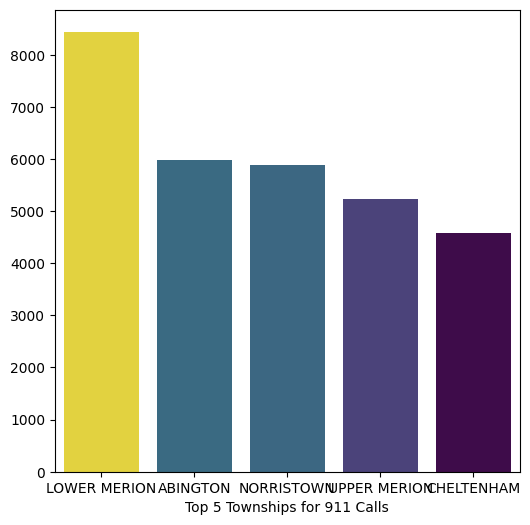

In [403]:
plt.figure(figsize=(6, 6))
sns.barplot(x=top_townships.index, y=top_townships.values,hue=top_townships, palette='viridis',legend=False)
plt.xlabel('Top 5 Townships for 911 Calls')
plt.show()

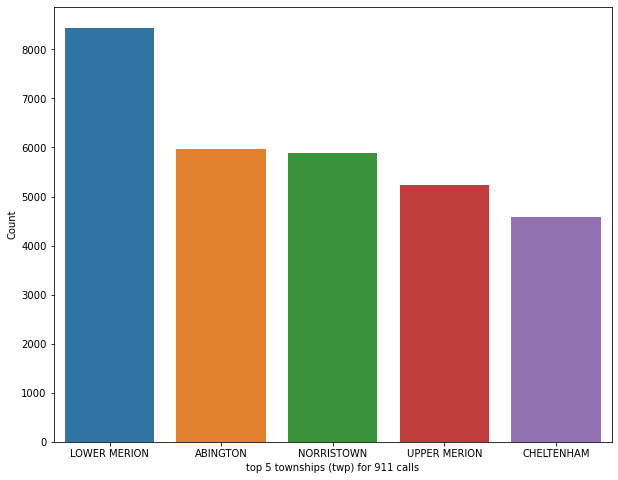

#### Take a look at the 'title' column, how many unique title codes are there?
#### What are those titles?
##### Hint: use unique() and nunique()

In [25]:
unique_titles = df['title'].unique()
num_unique_titles = df['title'].nunique()

In [28]:
print(num_unique_titles)

110


110

In [29]:
print(unique_titles)

['EMS: BACK PAINS/INJURY' 'EMS: DIABETIC EMERGENCY' 'Fire: GAS-ODOR/LEAK'
 'EMS: CARDIAC EMERGENCY' 'EMS: DIZZINESS' 'EMS: HEAD INJURY'
 'EMS: NAUSEA/VOMITING' 'EMS: RESPIRATORY EMERGENCY'
 'EMS: SYNCOPAL EPISODE' 'Traffic: VEHICLE ACCIDENT -'
 'EMS: VEHICLE ACCIDENT' 'Traffic: DISABLED VEHICLE -'
 'Fire: APPLIANCE FIRE' 'EMS: GENERAL WEAKNESS'
 'Fire: CARBON MONOXIDE DETECTOR' 'EMS: UNKNOWN MEDICAL EMERGENCY'
 'EMS: UNRESPONSIVE SUBJECT' 'Fire: VEHICLE ACCIDENT'
 'EMS: ALTERED MENTAL STATUS' 'Fire: FIRE ALARM' 'EMS: CVA/STROKE'
 'Traffic: ROAD OBSTRUCTION -' 'EMS: SUBJECT IN PAIN' 'EMS: HEMORRHAGING'
 'EMS: FALL VICTIM' 'EMS: ASSAULT VICTIM' 'EMS: SEIZURES'
 'EMS: MEDICAL ALERT ALARM' 'EMS: ABDOMINAL PAINS' 'Fire: PUMP DETAIL'
 'Fire: FIRE INVESTIGATION' 'EMS: OVERDOSE' 'EMS: MATERNITY'
 'EMS: UNCONSCIOUS SUBJECT' 'EMS: CHOKING' 'EMS: LACERATIONS'
 'Fire: TRASH/DUMPSTER FIRE' 'Fire: UNKNOWN TYPE FIRE'
 'Fire: BUILDING FIRE' 'Fire: ELECTRICAL FIRE OUTSIDE'
 'Fire: DEBRIS/FLUIDS ON HIGH

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

## Creating new features

- In the titles column there are "Reasons/Departments" specified before the title code. 
- These are <b>EMS, Fire, and Traffic</b>. 
- Use .apply() with a custom lambda expression to create a new column called "Reason" that contains these string values. 
- For example, if the title column value is <b>EMS: BACK PAINS/INJURY</b> , the Reason column value would be <b>EMS</b>.
##### Hint: You can use split() function in the lambda expression.

In [377]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [231]:
df['title']

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object

,title
0,EMS: BACK PAINS/INJURY
1,EMS: DIABETIC EMERGENCY
2,Fire: GAS-ODOR/LEAK
3,EMS: CARDIAC EMERGENCY
4,EMS: DIZZINESS
...,...
99487,Traffic: VEHICLE ACCIDENT -
99488,Traffic: VEHICLE ACCIDENT -
99489,EMS: FALL VICTIM
99490,EMS: NAUSEA/VOMITING


In [234]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

,Reason
0,EMS
1,EMS
2,Fire
3,EMS
4,EMS
...,...
99487,Traffic
99488,Traffic
99489,EMS
99490,EMS


### What is the most common Reason for a 911 call based off of this new column? 

In [36]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

### Create a pie chart to see the percentage of each reason.

In [235]:
reason_counts = df['Reason'].value_counts()
reason_counts.index

Index(['EMS', 'Traffic', 'Fire'], dtype='object', name='Reason')

Index(['EMS', 'Traffic', 'Fire'], dtype='object')

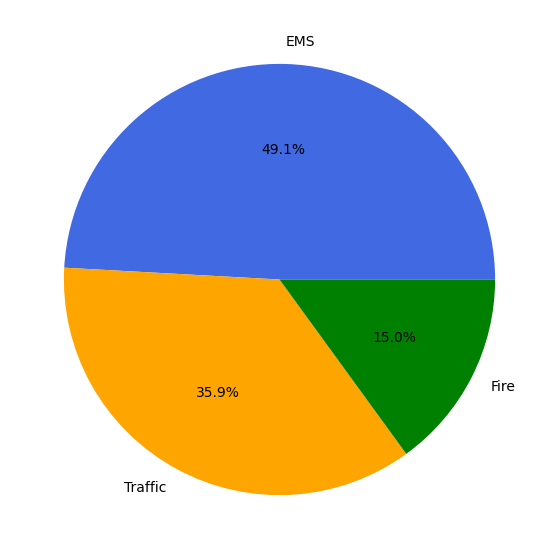

In [239]:


# Plot a pie chart
plt.figure(figsize=(7, 7))
plt.pie(reason_counts, labels=reason_counts.index, autopct='%1.1f%%', startangle=0, colors=['royalblue', 'orange', 'green'])
plt.show()

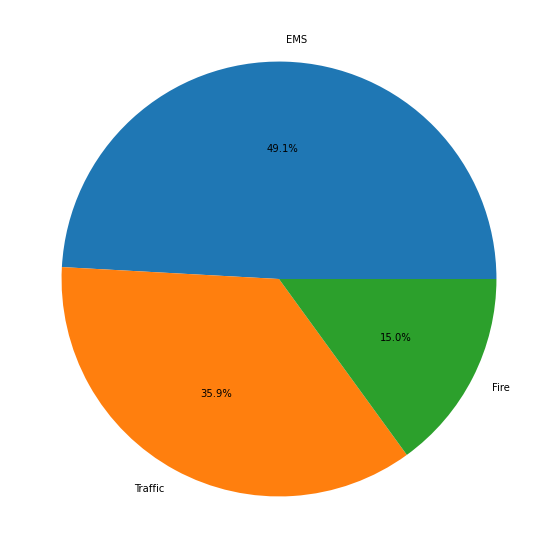

In [50]:
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

In [54]:
df['Reason'].value_counts().to_frame().style

,count
Reason,
EMS,48877
Traffic,35695
Fire,14920


,Reason
EMS,48877
Traffic,35695
Fire,14920


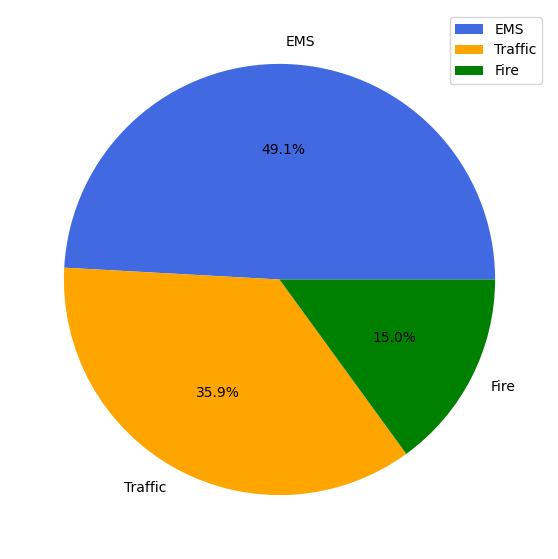

In [240]:
plt.figure(figsize=(7, 7))
plt.pie(reason_counts, labels=reason_counts.index, autopct='%1.1f%%', startangle=0, colors=['royalblue', 'orange', 'green'])
plt.legend(loc='upper right')
plt.show()

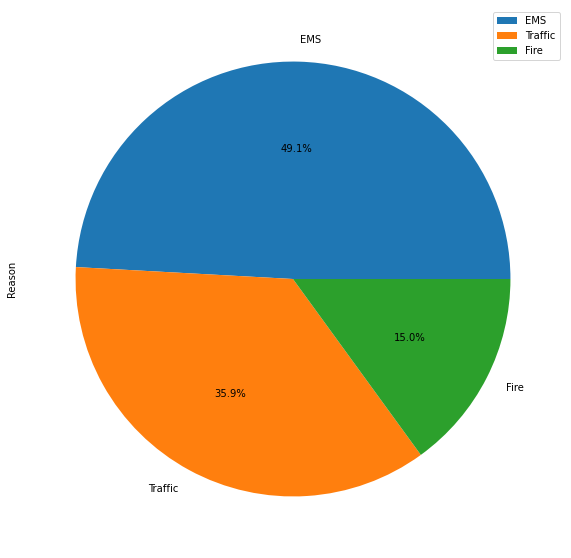

### Now use seaborn to create a countplot of 911 calls by Reason. 

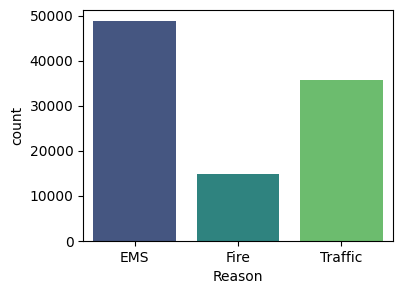

In [241]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Reason', data=df, palette='viridis',hue='Reason',legend=False)
plt.xlabel('Reason')
plt.show()

<AxesSubplot:xlabel='Reason', ylabel='count'>

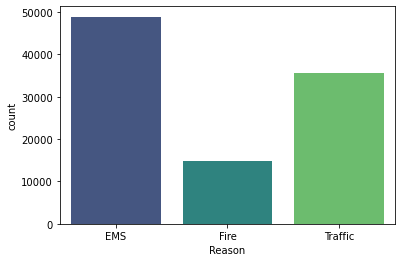

### Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.

In [378]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99492 non-null  float64       
 1   lng          99492 non-null  float64       
 2   desc         99492 non-null  object        
 3   zip          86637 non-null  float64       
 4   title        99492 non-null  object        
 5   timeStamp    99492 non-null  datetime64[ns]
 6   twp          99449 non-null  object        
 7   addr         98973 non-null  object        
 8   e            99492 non-null  int64         
 9   Reason       99492 non-null  object        
 10  Hour         99492 non-null  int64         
 11  Month        99492 non-null  int64         
 12  Day of Week  99492 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 9.9+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
 9   Reason     99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 7.6+ MB


In [243]:
time = df['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:40:00')

In [25]:
time = df['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:40:00')

In [75]:
time.hour

17

In [26]:
time.hour

17

In [76]:
time.month

12

In [27]:
time.month

12

In [77]:
time.day_of_week

3

In [337]:
time.day_of_week

3

### Create the following new columns:
- Now that the timestamp column are actually DateTime objects.
- use <b>.apply()</b> to create 3 new columns called Hour, Month, and Day of Week.
- You will create these columns based off of the timeStamp column.

In [379]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.day_of_week)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99492 non-null  float64       
 1   lng          99492 non-null  float64       
 2   desc         99492 non-null  object        
 3   zip          86637 non-null  float64       
 4   title        99492 non-null  object        
 5   timeStamp    99492 non-null  datetime64[ns]
 6   twp          99449 non-null  object        
 7   addr         98973 non-null  object        
 8   e            99492 non-null  int64         
 9   Reason       99492 non-null  object        
 10  Hour         99492 non-null  int64         
 11  Month        99492 non-null  int64         
 12  Day of Week  99492 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 9.9+ MB


In [343]:
df[['Hour', 'Month', 'Day of Week']]

,Hour,Month,Day of Week
0,17,12,3
1,17,12,3
2,17,12,3
3,17,12,3
4,17,12,3
...,...,...,...
99487,11,8,2
99488,11,8,2
99489,11,8,2
99490,11,8,2


,Hour,Month,Day of Week
0,17,12,3
1,17,12,3
2,17,12,3
3,17,12,3
4,17,12,3
...,...,...,...
99487,11,8,2
99488,11,8,2
99489,11,8,2
99490,11,8,2


### Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. 

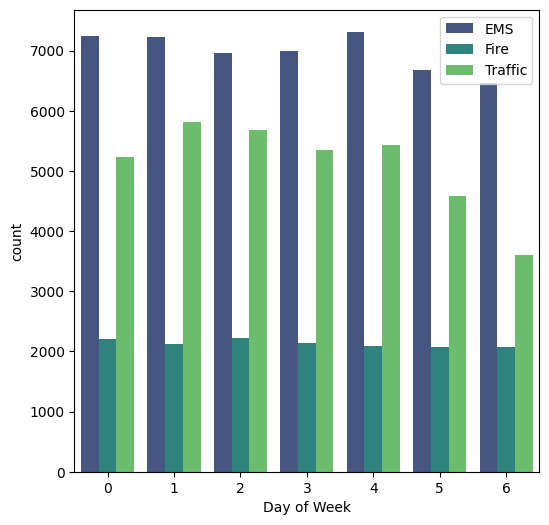

In [346]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Day of Week',data=df, hue='Reason')
plt.xlabel('Day of Week')
plt.legend(loc='upper right')

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

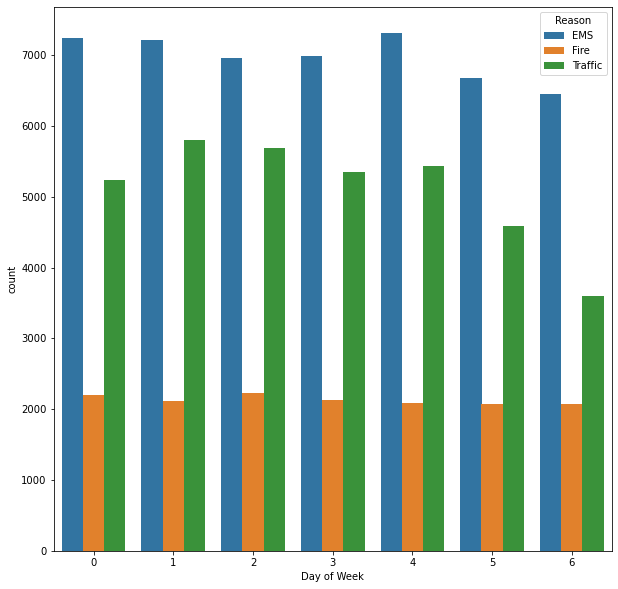

### Use map function to change the Day of Week from numbers to actual days and replot.

In [380]:
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['Days of Week'] = df['Day of Week'].map(day_mapping)

In [382]:
df['Days of Week']

0         Thursday
1         Thursday
2         Thursday
3         Thursday
4         Thursday
           ...    
99487    Wednesday
99488    Wednesday
99489    Wednesday
99490    Wednesday
99491    Wednesday
Name: Days of Week, Length: 99492, dtype: object

<Axes: xlabel='Days of Week', ylabel='count'>

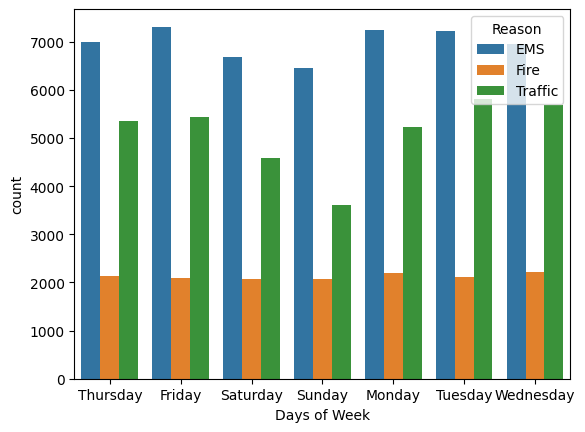

In [381]:
sns.countplot(x='Days of Week', hue='Reason', data=df)

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

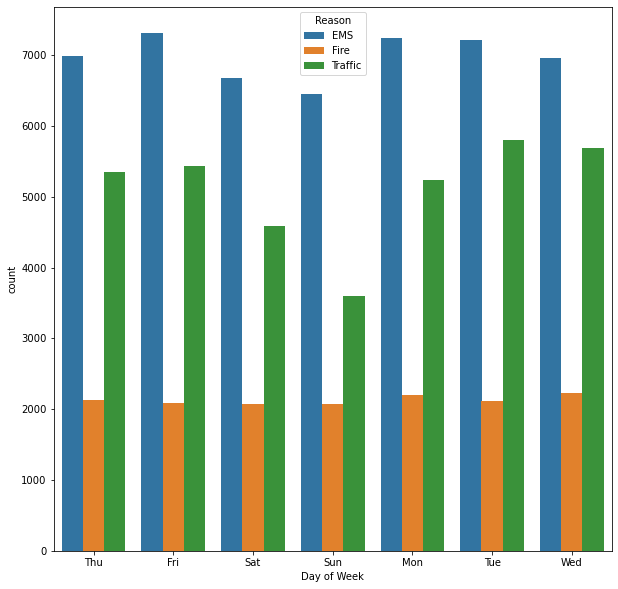

### Use seaborn to create a countplot of the Month column with the hue based off of the Reason column. 

<AxesSubplot:xlabel='Month', ylabel='count'>

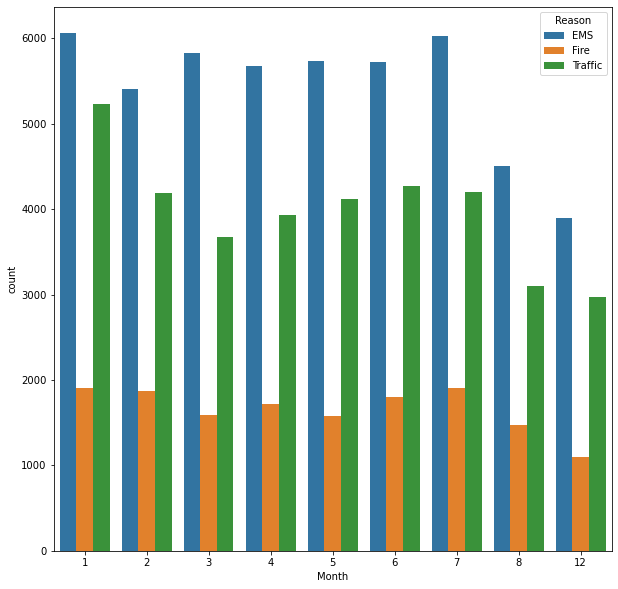

## Other data analysis

In [349]:
#Create a Dictionary of series
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Smith','Jack',
   'Lee','David','Gasper','Betina','Andres']),
   'Age':pd.Series([25,26,25,23,30,29,23,34,40,30,51,46]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65])
}

#Create a DataFrame
df = pd.DataFrame(d)
df

,Name,Age,Rating
0,Tom,25,4.23
1,James,26,3.24
2,Ricky,25,3.98
3,Vin,23,2.56
4,Steve,30,3.20
5,Smith,29,4.60
6,Jack,23,3.80
7,Lee,34,3.78
8,David,40,2.98
9,Gasper,30,4.80


### Find the sum of the values for the Ages and Ratings

In [350]:
pd.Series({'Age': df['Age'].sum(), 'Rating': df['Rating'].sum()})

Age       382.00
Rating     44.92
dtype: float64

Age       382.00
Rating     44.92
dtype: float64

### Find the average age and rating

In [100]:
pd.Series({'Age': df['Age'].mean(), 'Rating': df['Rating'].mean()})

Age       31.833333
Rating     3.743333
dtype: float64

Age       31.833333
Rating     3.743333
dtype: float64

### Find the standard deviation of age and rating

In [101]:
pd.Series({'Age': df['Age'].std(), 'Rating': df['Rating'].std()})

Age       9.232682
Rating    0.661628
dtype: float64

Age       9.232682
Rating    0.661628
dtype: float64

### Find the minimum of age and rating

In [102]:
pd.Series({'Age': df['Age'].min(), 'Rating': df['Rating'].min()})

Age       23.00
Rating     2.56
dtype: float64

Age       23.00
Rating     2.56
dtype: float64

### Find the maximum of age and rating

In [103]:
pd.Series({'Age': df['Age'].max(), 'Rating': df['Rating'].max()})

Age       51.0
Rating     4.8
dtype: float64

Age       51.0
Rating     4.8
dtype: float64

### Find the median of age and rating

In [104]:
pd.Series({'Age': df['Age'].median(), 'Rating': df['Rating'].median()})

Age       29.50
Rating     3.79
dtype: float64

Age       29.50
Rating     3.79
dtype: float64

### Find the mode of age

In [109]:
df['Age'].mode()

0    23
1    25
2    30
Name: Age, dtype: int64

In [110]:
df['Age'].to_frame().mode()

,Age
0,23
1,25
2,30


,Age
0,23
1,25
2,30


### Find the value_counts() of age to check the frequency of each age.

In [260]:
df['Age'].value_counts()

Age
25    2
23    2
30    2
26    1
29    1
34    1
40    1
51    1
46    1
Name: count, dtype: int64

25    2
23    2
30    2
26    1
29    1
34    1
40    1
51    1
46    1
Name: Age, dtype: int64

### Use count plot of age to see the frequency of each age.

C:\Users\HP\AppData\Local\Temp\ipykernel_23056\2208575861.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=df, palette='viridis')


Text(0.5, 0, 'Age')

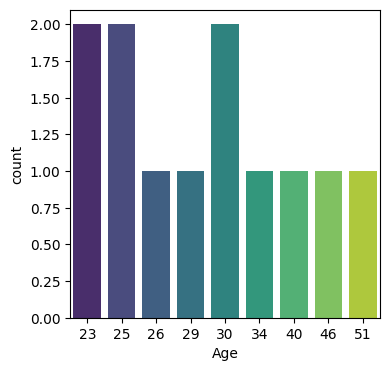

In [352]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Age', data=df, palette='viridis')
plt.xlabel('Age')


<AxesSubplot:xlabel='Age', ylabel='count'>

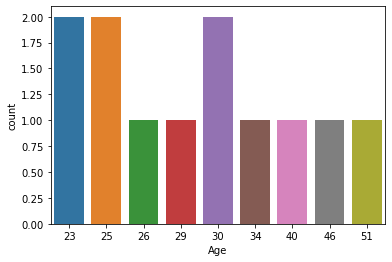

### Use histplot to see the distribution of ages and ratings.

<Axes: xlabel='Age', ylabel='Count'>

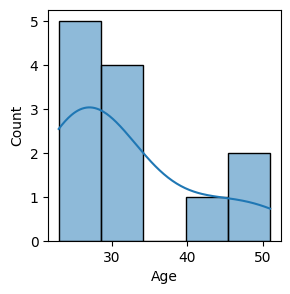

In [121]:
plt.figure(figsize=(3, 3))
sns.histplot(df['Age'],kde=True)


<AxesSubplot:xlabel='Age', ylabel='Count'>

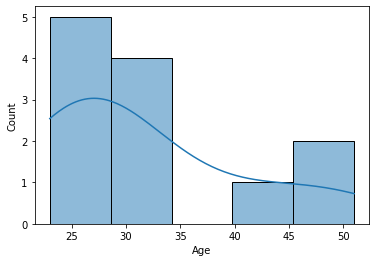

<Axes: xlabel='Rating', ylabel='Count'>

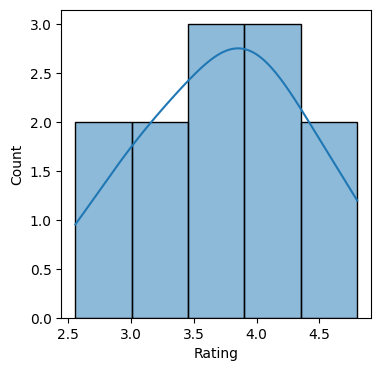

In [123]:
plt.figure(figsize=(4, 4))
sns.histplot(df['Rating'],kde=True)

<AxesSubplot:xlabel='Rating', ylabel='Count'>

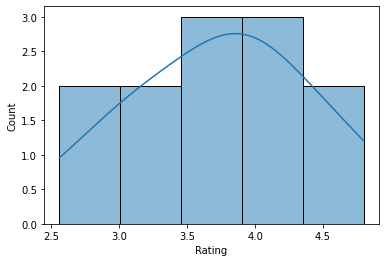

### Display the descriptive statistics of the dataframe

In [124]:
df.describe()

,Age,Rating
count,12.000000,12.000000
mean,31.833333,3.743333
std,9.232682,0.661628
min,23.000000,2.560000
25%,25.000000,3.230000
50%,29.500000,3.790000
75%,35.500000,4.132500
max,51.000000,4.800000


,Age,Rating
count,12.000000,12.000000
mean,31.833333,3.743333
std,9.232682,0.661628
min,23.000000,2.560000
25%,25.000000,3.230000
50%,29.500000,3.790000
75%,35.500000,4.132500
max,51.000000,4.800000


## Titanic Data Analysis
[Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). 
##### Features:
- survival - Survival (0 = No; 1 = Yes)
- pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### Read the Titanic.csv file into Pandas dataframe

In [407]:
df= pd.read_csv("titanic.csv")

### Display the info of the dataframe

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Display the descriptive statistics of the dataframe

In [128]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Perform pairplot of the dataframe

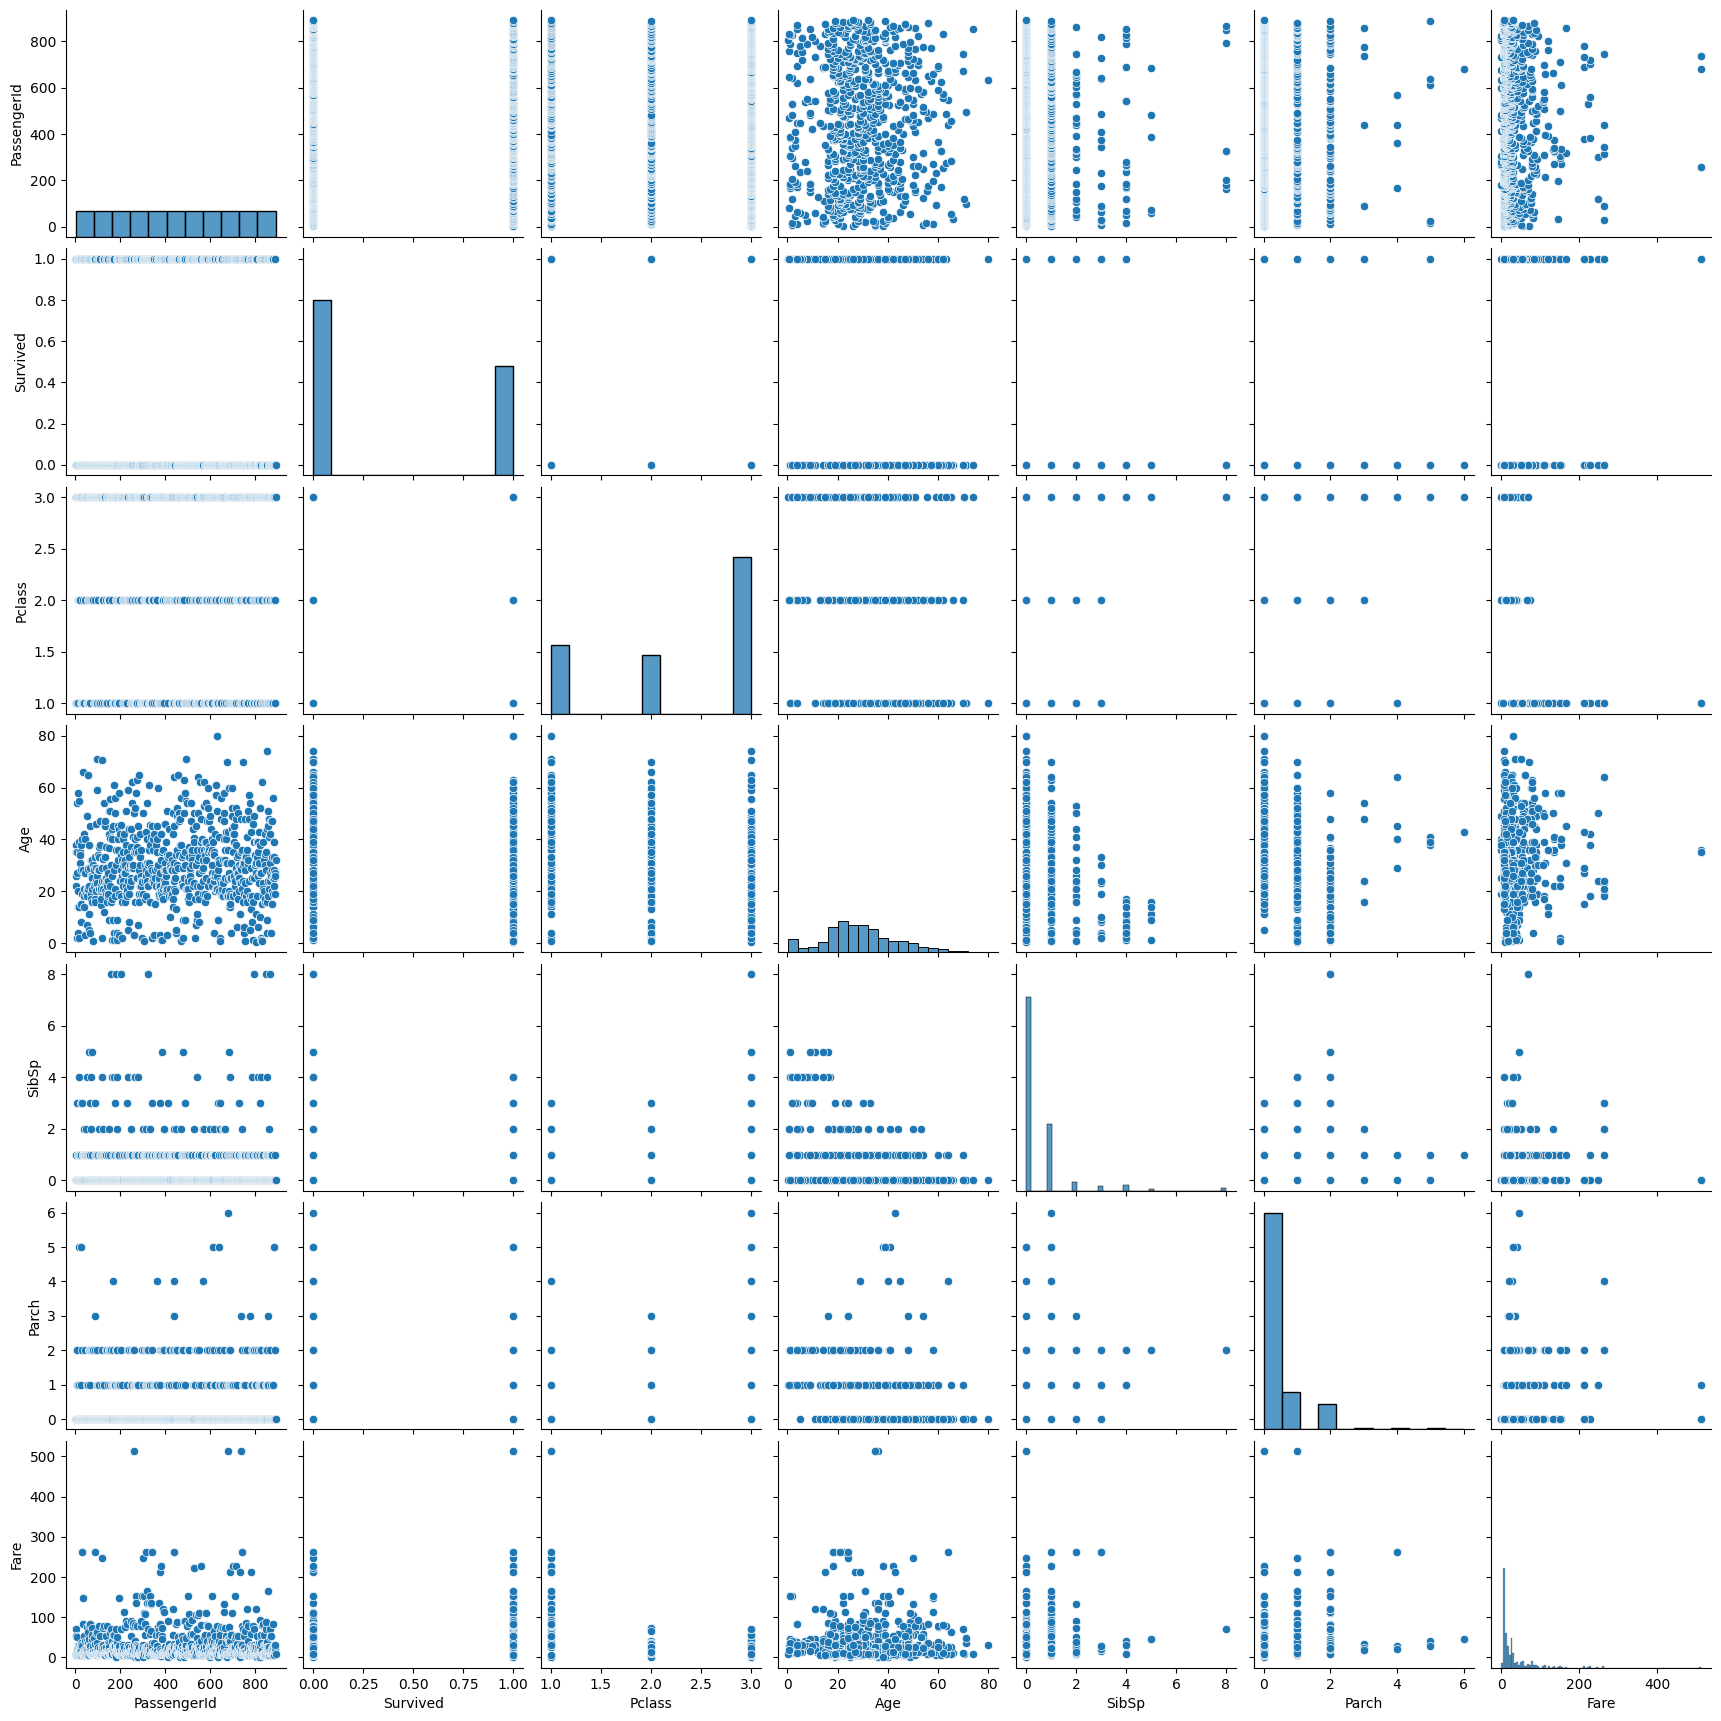

In [265]:
sns.pairplot(df)

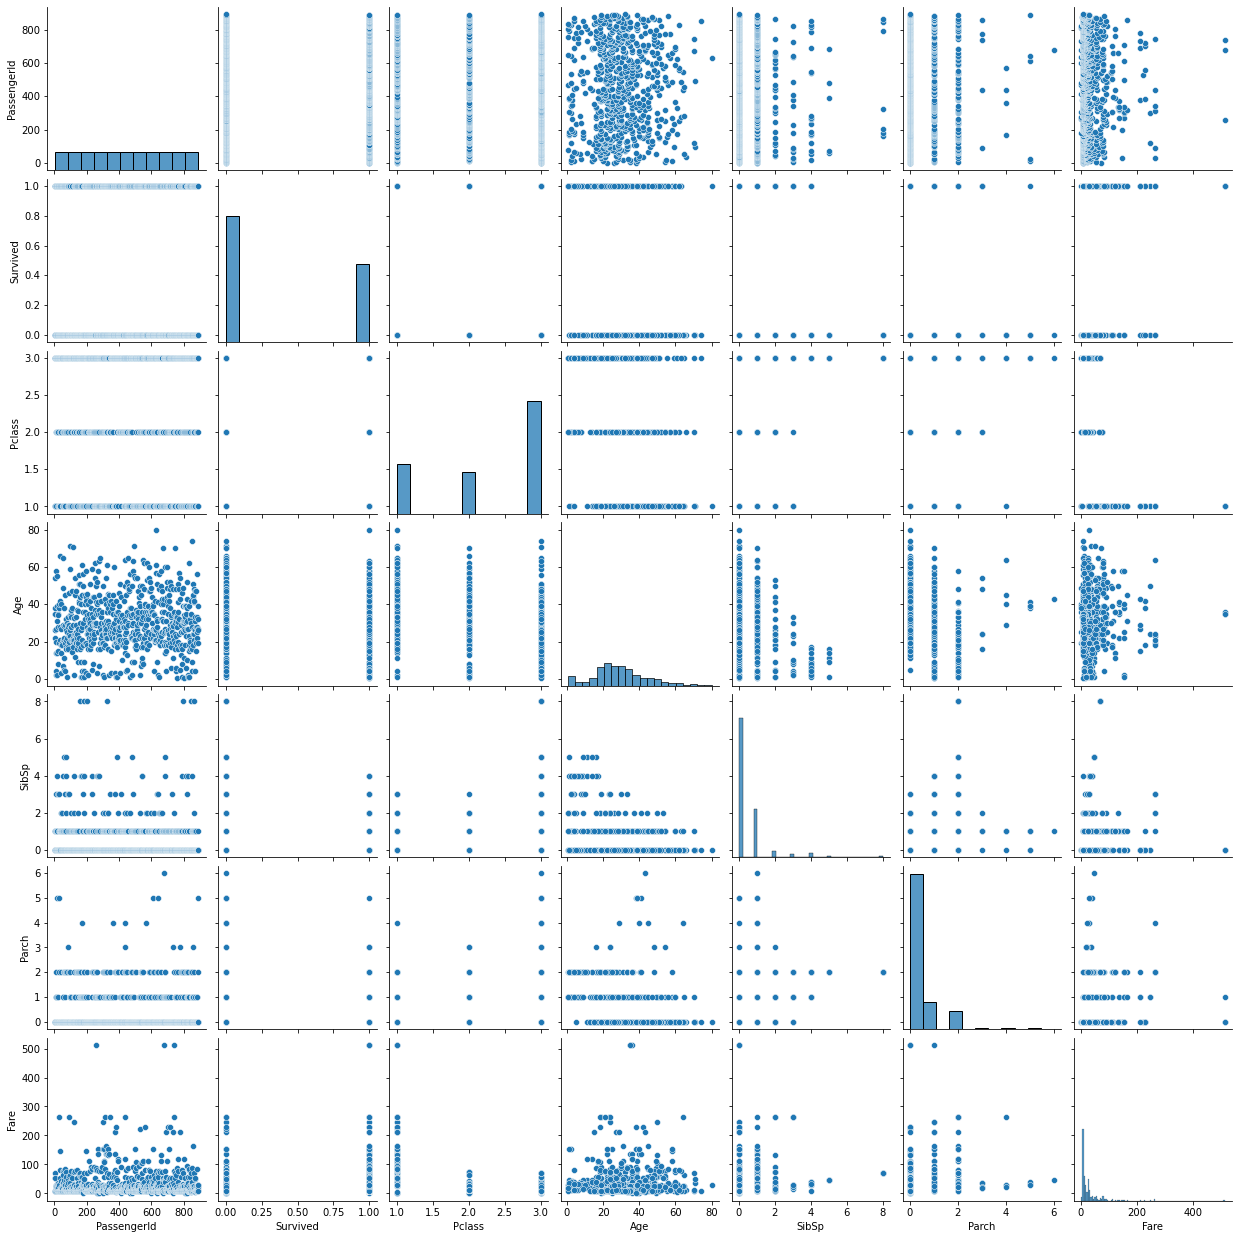

### Perform pairplot of the dataframe with hue='Survived'

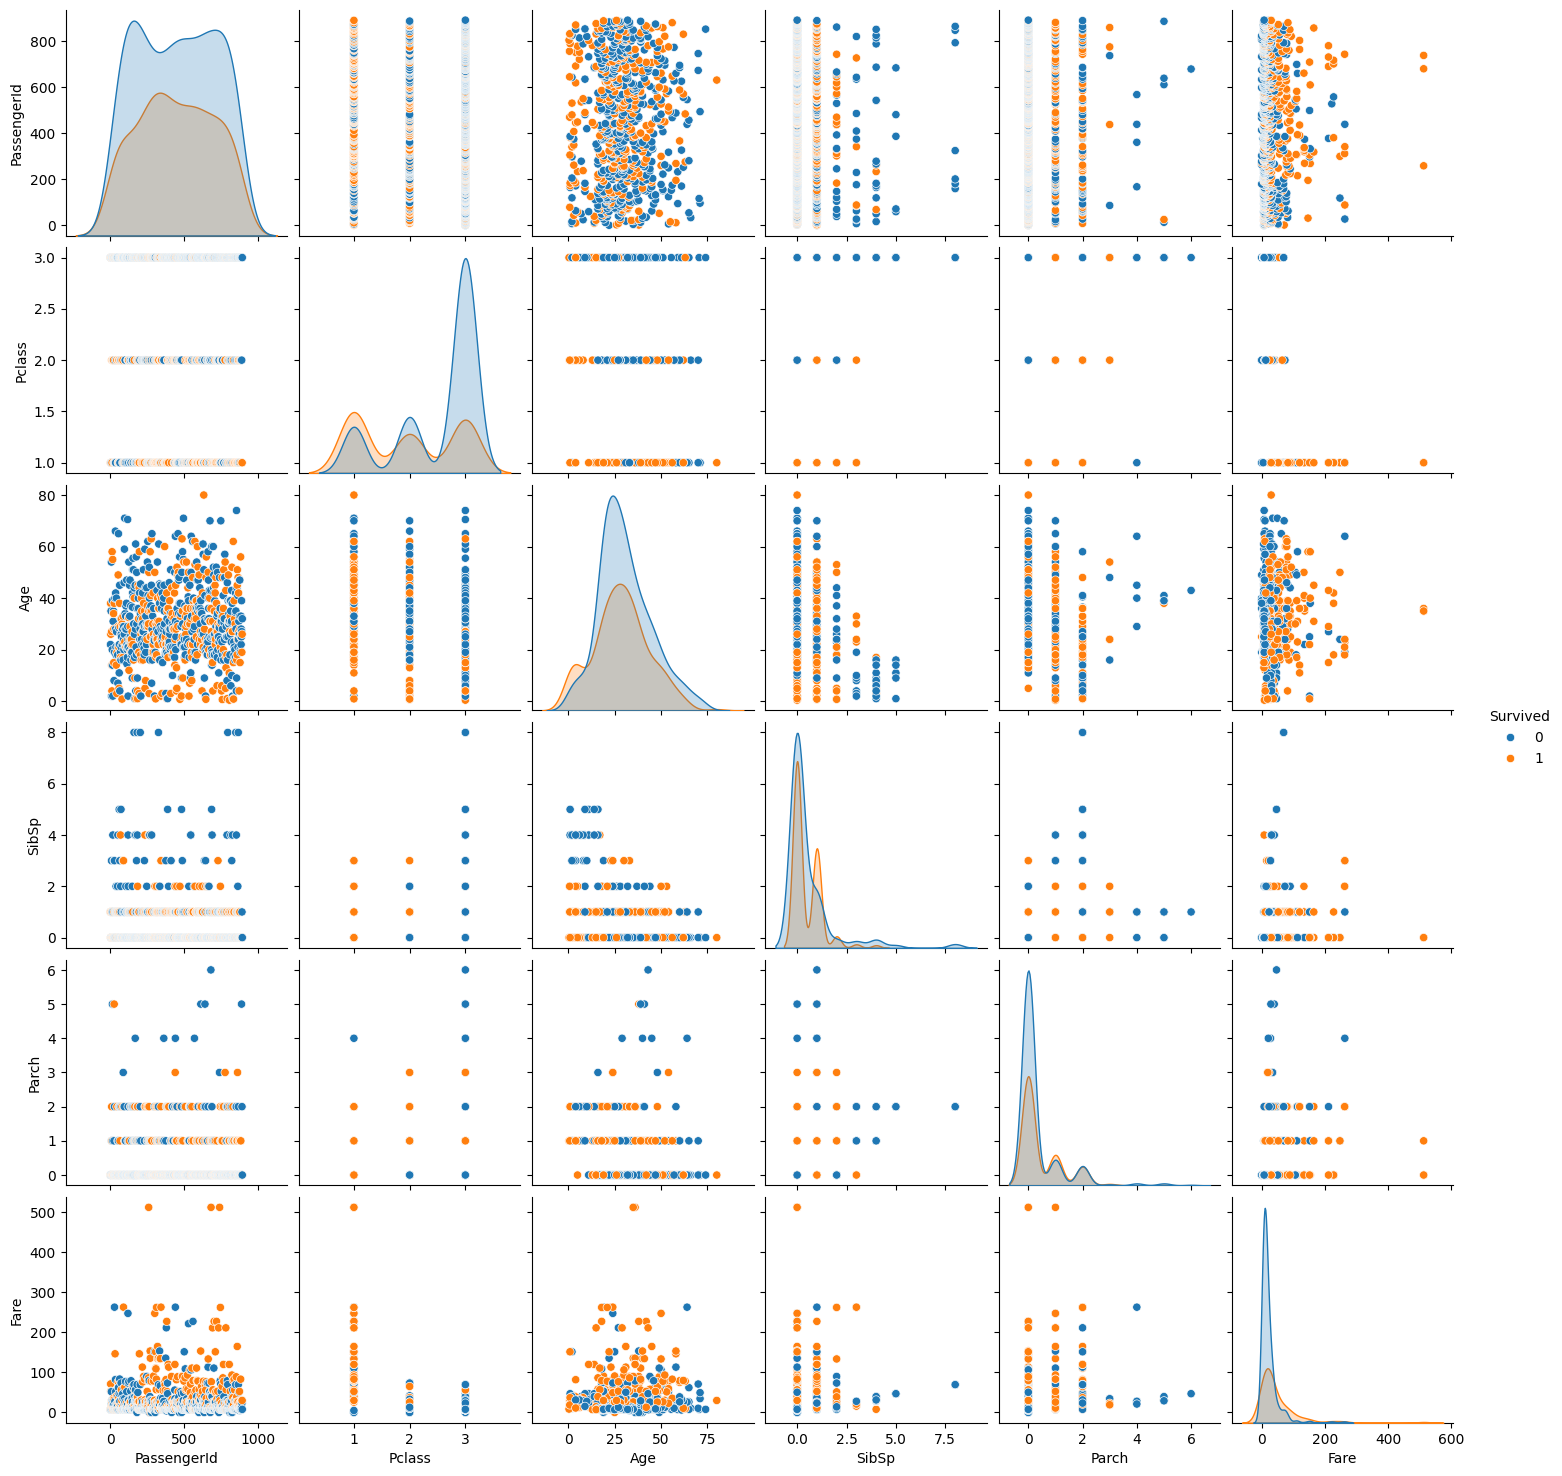

In [130]:
sns.pairplot(df,hue='Survived')

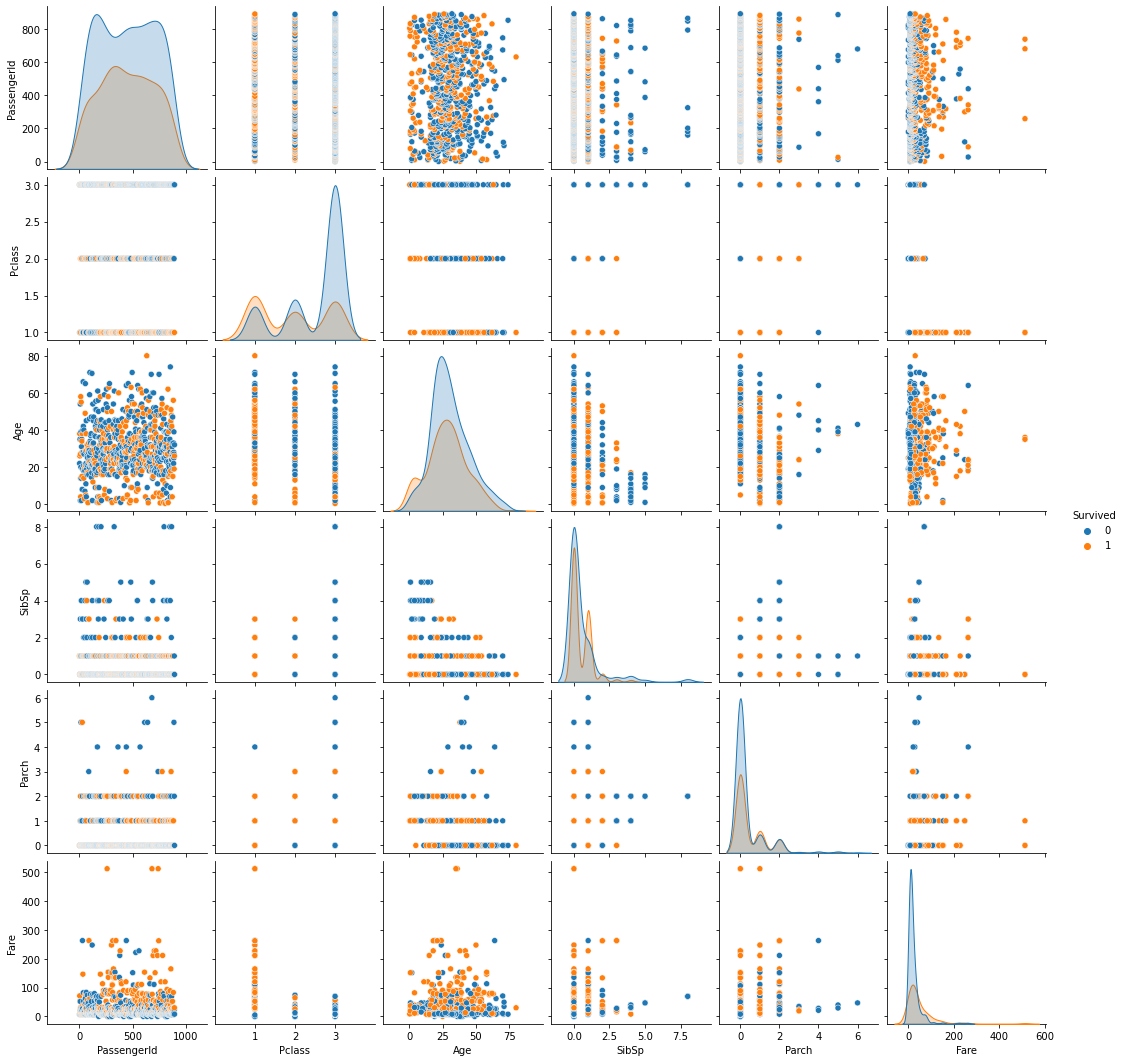

**Use pie chart to see the percentage of Survived/Unservived people**

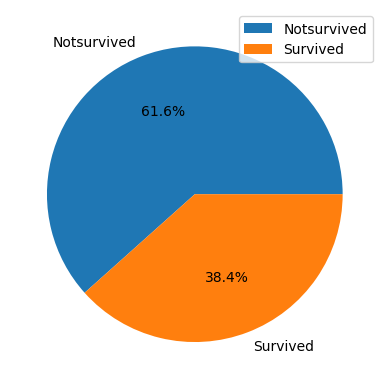

In [280]:
survived_counts = df['Survived'].value_counts()
labels = ['Notsurvived', 'Survived']
plt.pie(survived_counts, labels=labels, autopct='%1.1f%%')
plt.legend(labels=labels, loc='upper right')

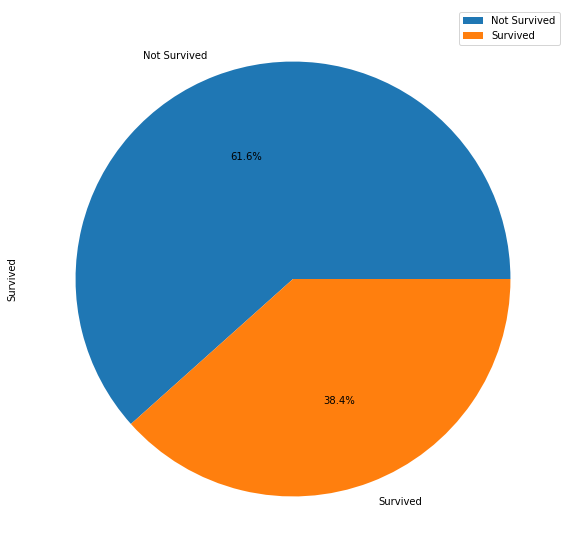

### Use pie chart to see the percentage of Passenger Class (Pclass)

In [285]:
pclass_counts = df['Pclass'].value_counts()
pclass_counts.index

Index([3, 1, 2], dtype='int64', name='Pclass')

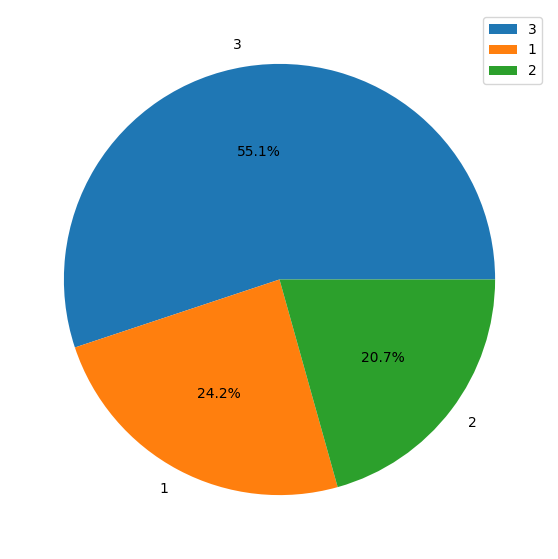

In [292]:
plt.figure(figsize=(7,7))
pclass_counts = df['Pclass'].value_counts()
plt.pie(pclass_counts,labels=pclass_counts.index,autopct='%1.1f%%')
plt.legend(labels=pclass_counts.index,loc='upper right')

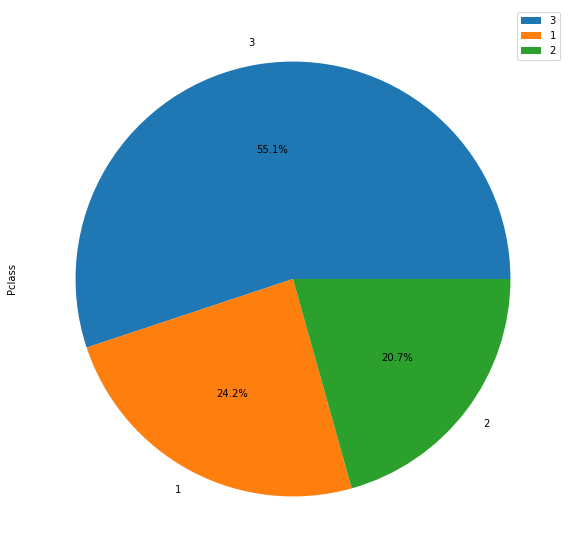

**Use count plot to display  how many people survived vs. unservived**

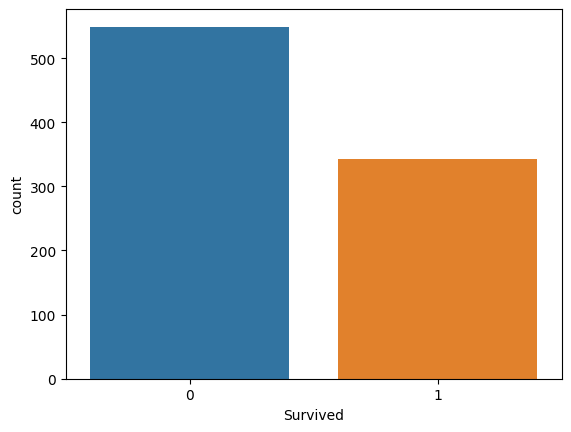

In [294]:
sns.countplot(x='Survived',data=df,hue='Survived',legend=False)
plt.xlabel('Survived')
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

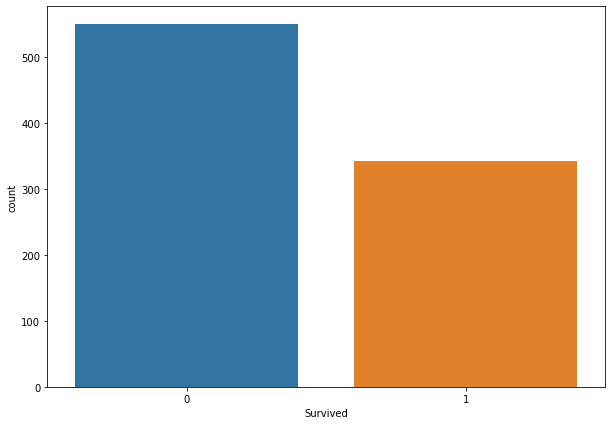

### Use count plot to display  how many people survived vs. unservived categorized by gender (sex)

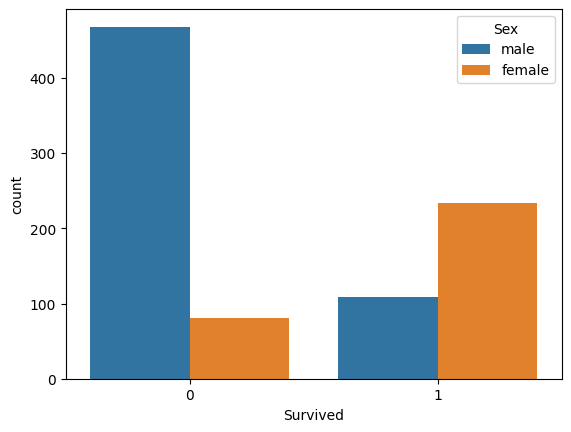

In [295]:
sns.countplot(x='Survived', data=df, hue='Sex')
plt.xlabel('Survived')
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

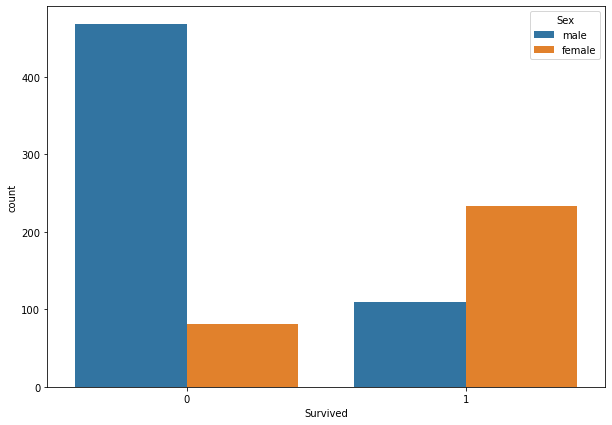

### Use count plot to display  how many people survived vs. unservived categorized by Pclass

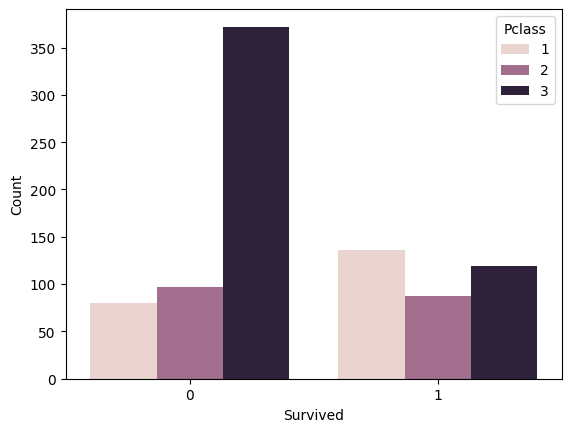

In [301]:
sns.countplot(x='Survived', data=df, hue='Pclass')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

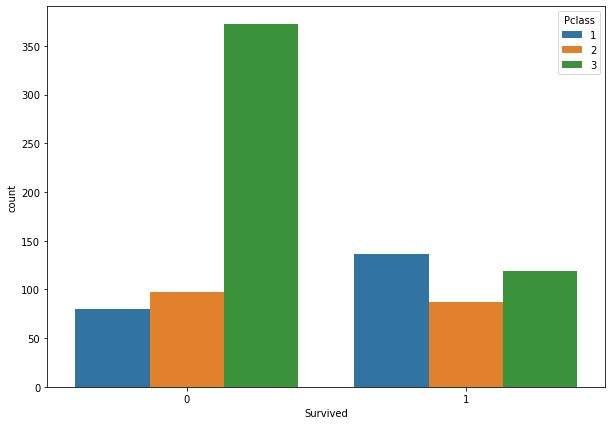

### Check the distribution of Age

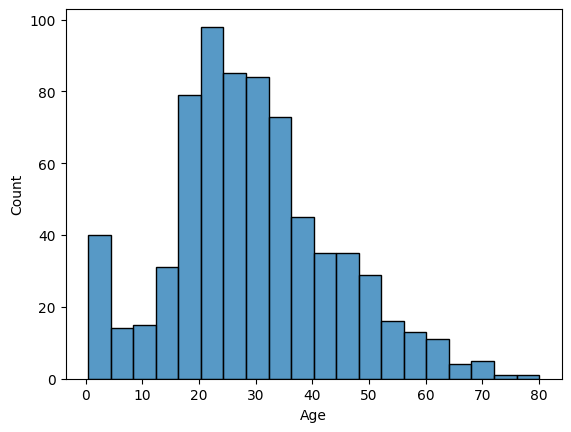

In [302]:
sns.histplot(df['Age'], bins=20)  
plt.xlabel('Age')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

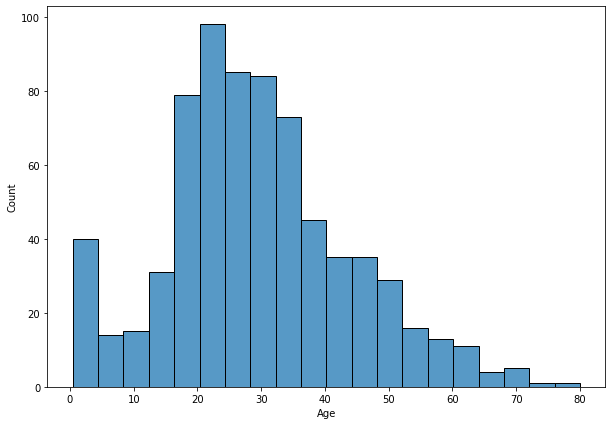

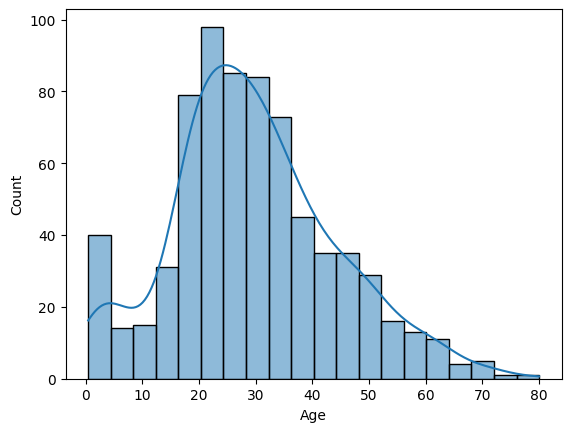

In [303]:
sns.histplot(df['Age'], bins=20,kde='true')  
plt.xlabel('Age')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

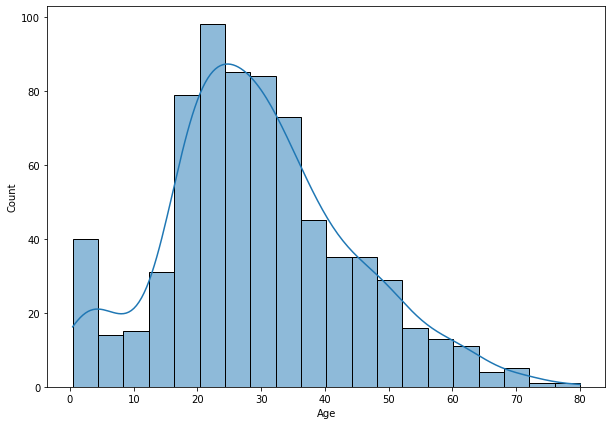

### Use box plot to display  the distribution of Age in each Pclass

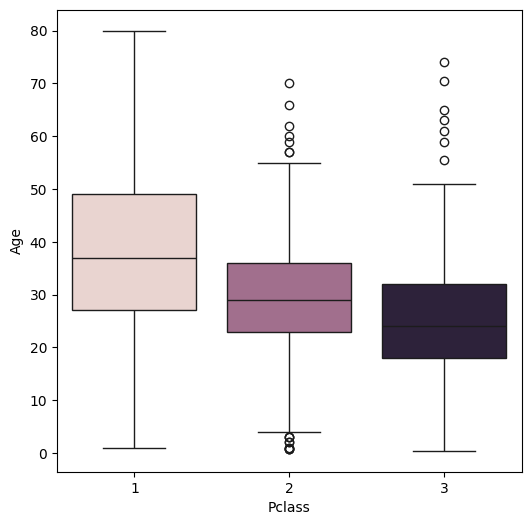

In [159]:
plt.figure(figsize=(6,6))
sns.boxplot(x='Pclass', y='Age',hue='Pclass', data=df,legend=False)
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

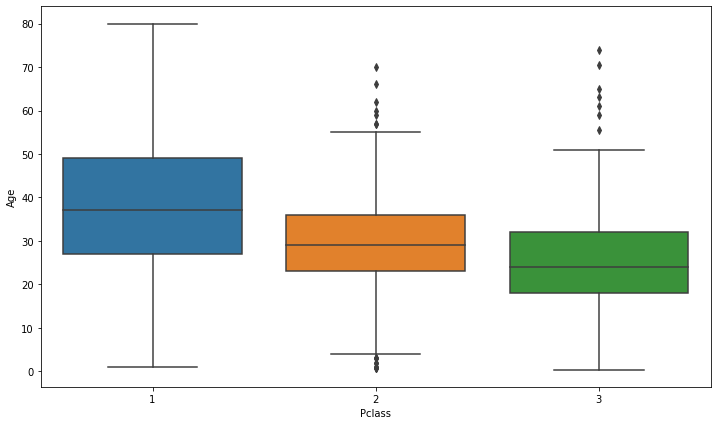

### Use box plot to display  the distribution of Age for survived/unservived passangers

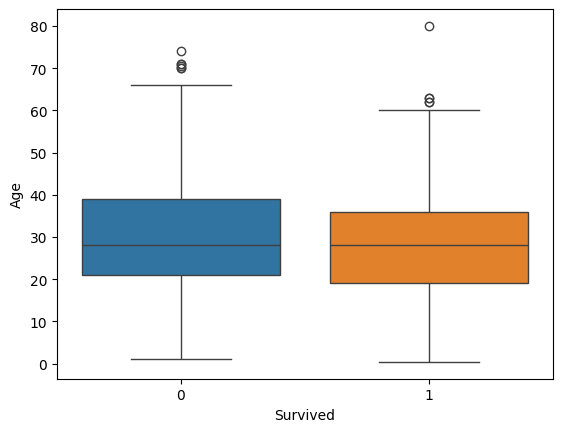

In [309]:
sns.boxplot(x='Survived', y='Age',hue='Survived', data=df,legend=False)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='Age'>

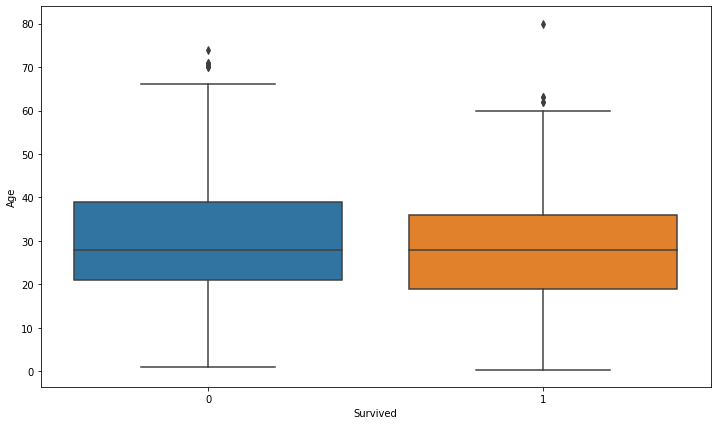

### Display the distribution of the ticket fare (Fare)

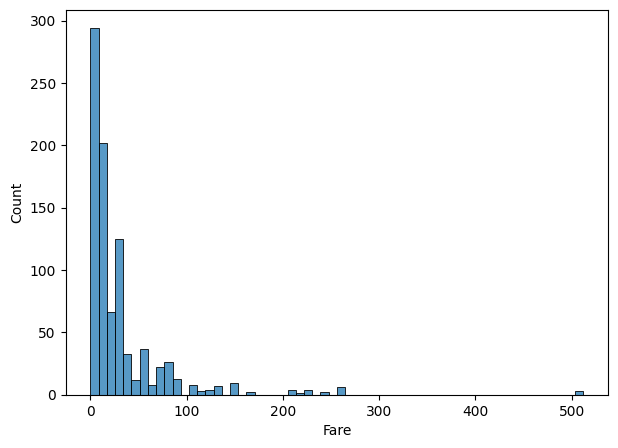

In [171]:
plt.figure(figsize=(7,5))
sns.histplot(df['Fare'], bins=60)
plt.show()

<AxesSubplot:xlabel='Fare', ylabel='Count'>

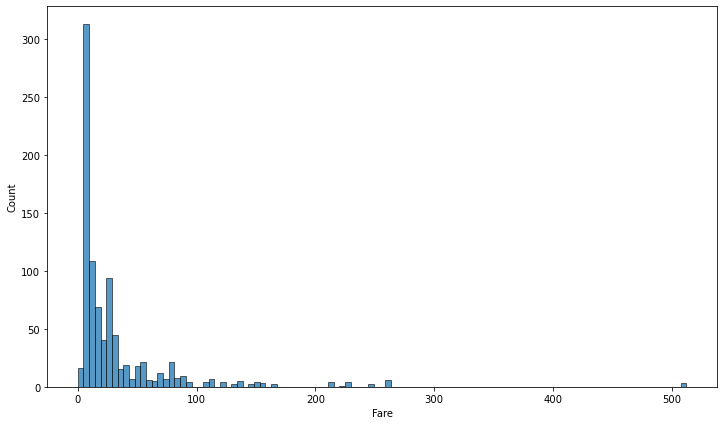

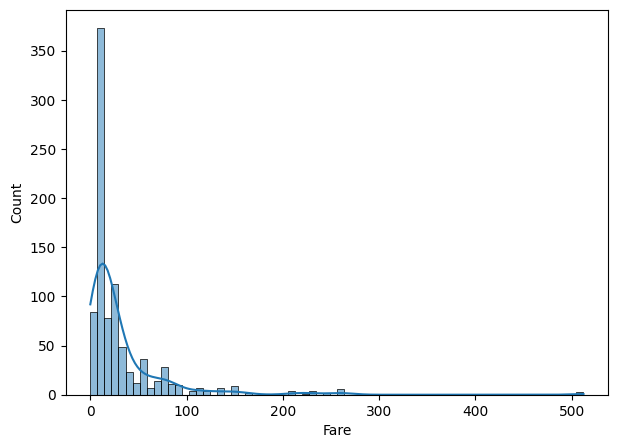

In [173]:
plt.figure(figsize=(7,5))
sns.histplot(df['Fare'], bins=70, kde=True)
plt.show()

<AxesSubplot:xlabel='Fare', ylabel='Count'>

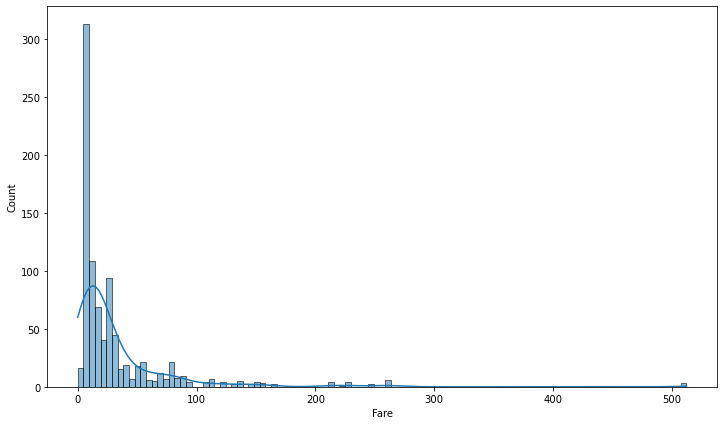

### Calculate the mean Fare

In [174]:
df['Fare'].mean()

32.204207968574636

32.2042079685746

### Calculate the mode Fare

In [409]:
df['Fare'].mode()

0    8.05
Name: Fare, dtype: float64

0    8.05
Name: Fare, dtype: float64

### Calculate the median Fare

In [176]:
df['Fare'].median()

14.4542

14.4542

### Calculate the min,max and quartiles of Fare

In [181]:
df['Fare'].describe()


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

0.00      0.0000
0.25      7.9104
0.50     14.4542
0.75     31.0000
1.00    512.3292
Name: Fare, dtype: float64

### Display the distribution of the ticket fare (Fare) with mean, mode, and median

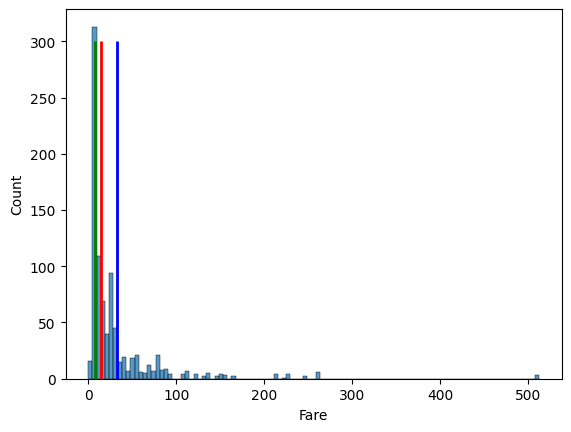

In [414]:
med = df['Fare'].median()
mod = df['Fare'].mode()
men = df['Fare'].mean()
plt.vlines(med,0, 300, color='red',  linewidth=2, label='Median')
plt.vlines(mod,0, 300, color='green', linewidth=2, label='Mode')
plt.vlines(men,0, 300, color='blue',linewidth=2, label='Mean')
sns.histplot(x='Fare', data=df)
plt.show()

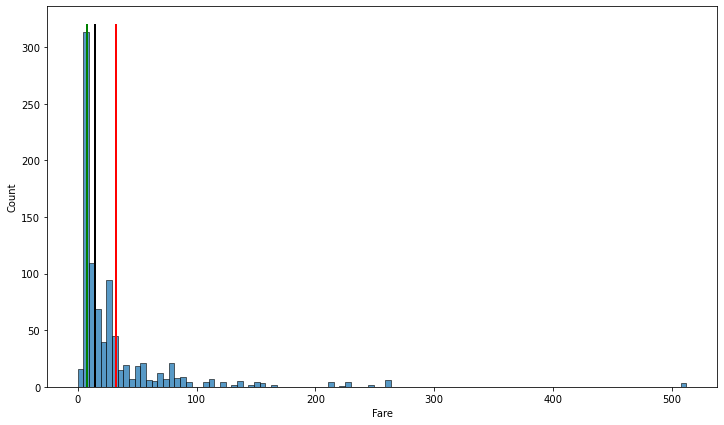

### Display the distribution of the ticket fare (Fare) with histplot and boxplot

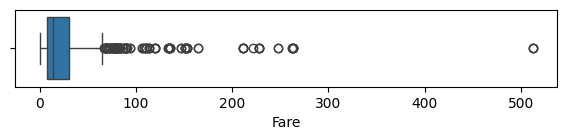

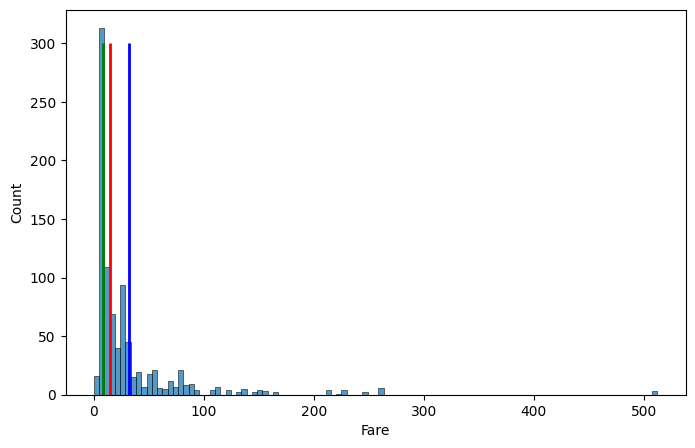

In [416]:
plt.figure(figsize=(7,1))
sns.boxplot(x=df['Fare'])
plt.show()

plt.figure(figsize=(8,5))
med = df['Fare'].median()
mod = df['Fare'].mode()
men = df['Fare'].mean()
plt.vlines(med,0, 300, color='red',  linewidth=2, label='Median')
plt.vlines(mod,0, 300, color='green', linewidth=2, label='Mode')
plt.vlines(men,0, 300, color='blue',linewidth=2, label='Mean')
sns.histplot(x='Fare', data=df)
plt.show()

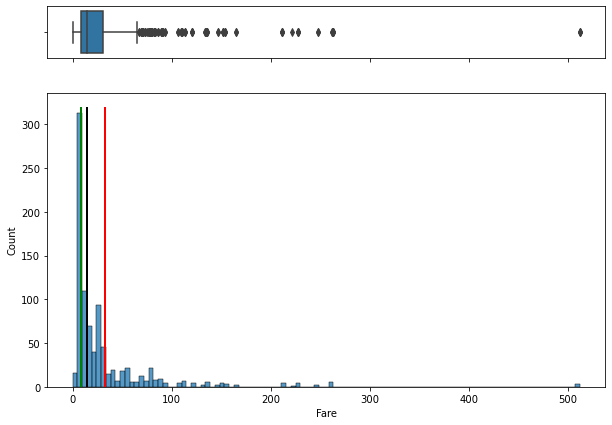

**Can you tell what kind of skewness of the Fare data?**

In [ ]:
right skewed

### Use any technique to convert the skewed data to unskewed data and replot
##### Hint: Drop the rows with 0 fare.

In [418]:
df_copy= df[df['Fare'] > 0]
df_copy['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 876, dtype: float64

In [ ]:
# df['log_fare'] = df['fare'].apply(log)

In [419]:
df_copy['Log_Fare'] = np.log1p(df['Fare'])

C:\Users\HP\AppData\Local\Temp\ipykernel_23056\2327916096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Log_Fare'] = np.log1p(df['Fare'])


In [420]:
df_copy['Log_Fare'].isnull().sum()  

0

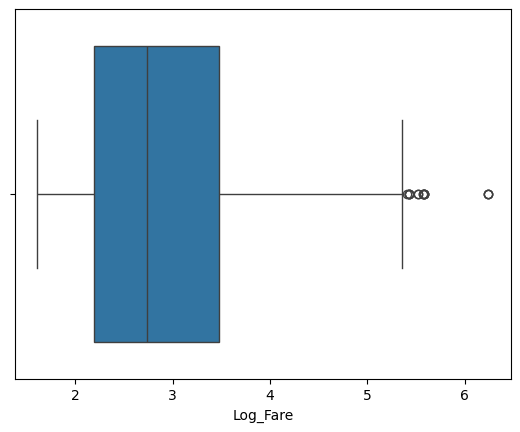

<Axes: xlabel='Log_Fare', ylabel='Count'>

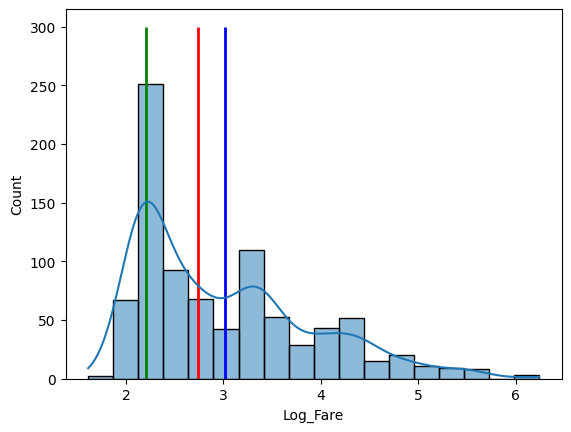

In [421]:
sns.boxplot(x=df_copy['Log_Fare'])
plt.show()
med = df_copy['Log_Fare'].median()
mod = df_copy['Log_Fare'].mode()
men = df_copy['Log_Fare'].mean()
plt.vlines(med,0, 300, color='red',  linewidth=2, label='Median')
plt.vlines(mod,0, 300, color='green', linewidth=2, label='Mode')
plt.vlines(men,0, 300, color='blue',linewidth=2, label='Mean')
sns.histplot(x='Log_Fare', data=df_copy,kde=True)


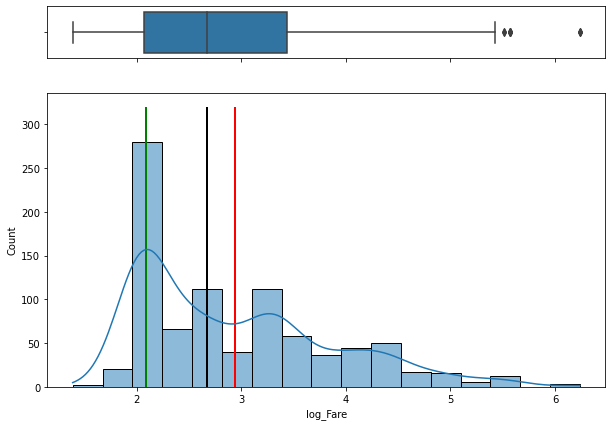